In [2]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [3]:
# Original Data Path
original_dataset_dir = './datasets/train'

# Small Data Path
base_dir = './datasets/cats_and_dogs_small'

# 있는지 확인
if os.path.exists(base_dir):
    # 있으면 지워버리기
    shutil.rmtree(base_dir)
# 만들기
os.mkdir(base_dir)

In [6]:
# Train, Vaildation, Test data
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [7]:
# cats and dog 디렉토리
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [8]:
# file copy

# 파린이 코드
#fnames = []
#for i in range(1000):
#    filenmae = 'cat.{}.jpg'.format(i)
#    fnames.append(filenmae)


# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [9]:
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
print('------------------ Valiadation dataset copy completed')

------------------ Valiadation dataset copy completed


In [10]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)
print('------------------ Test dataset copy completed')

------------------ Test dataset copy completed


In [13]:
print('Train cat images: ',len(os.listdir(train_cats_dir)))
print('Train dog images: ',len(os.listdir(train_dogs_dir)))
print('Validation cat images: ',len(os.listdir(validation_cats_dir)))
print('Validation dog images: ',len(os.listdir(validation_dogs_dir)))
print('Test cat images: ',len(os.listdir(test_cats_dir)))
print('Test dog images: ',len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [14]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [43]:
# Data Prepocessing

# Image scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                target_size = (150,150),
                                                batch_size = 20,
                                                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ' , data_batch.shape)
    print('Batch Label Size: ' , labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [20]:
history = model.fit_generator(train_generator,
                             steps_per_epoch= 100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 60s 605ms/step - loss: 0.7607 - accuracy: 0.5285 - val_loss: 0.6916 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 50s 500ms/step - loss: 0.7154 - accuracy: 0.5540 - val_loss: 0.6866 - val_accuracy: 0.5050
Epoch 3/30
100/100 [==============================] - 50s 503ms/step - loss: 0.6798 - accuracy: 0.6070 - val_loss: 0.6414 - val_accuracy: 0.6410
Epoch 4/30
100/100 [==============================] - 50s 502ms/step - loss: 0.6220 - accuracy: 0.6620 - val_loss: 0.6220 - val_accuracy: 0.6500
Epoch 5/30
100/100 [==============================] - 51s 506ms/step - loss: 0.5528 - accuracy: 0.7180 - val_loss: 0.6016 - val_accuracy: 0.6730
Epoch 6/30
100/100 [==============================] - 51s 511ms/step - loss: 0.5129 - accuracy: 0.7460 - val_loss: 0.5906 - val_accuracy: 0.6860
Epoch 7/30
100/100 [==============================] - 

In [22]:
model.save('cat_and_dogs_small_1.0.h5')

Text(0.5, 1.0, 'Training and validation loss')

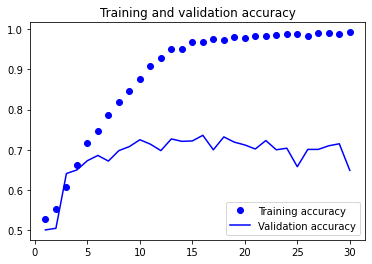

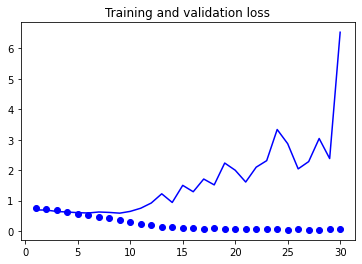

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo' , label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo' , label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')

In [25]:
datagen = ImageDataGenerator(rotation_range=40, # 40도정도 돌려서 증식
                            width_shift_range=0.2, # 수평으로 옮겨보기 증식
                            height_shift_range=0.2, # 상하로 옮겨보기 증식
                            shear_range=0.2, # 이미지 기울기 (전단변화)
                            zoom_range=0.2, # 확대 축소 
                            horizontal_flip=True, # 좌우 반전
                            fill_mode='nearest') # 빈칸을 뭐로 채울것인가 nearest - 근처 값으로 가득 채우겠다.

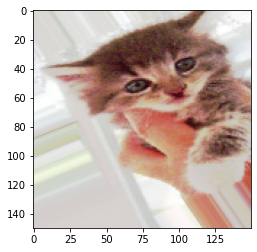

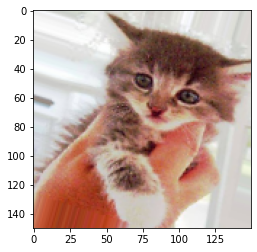

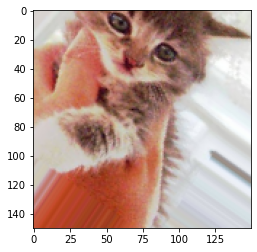

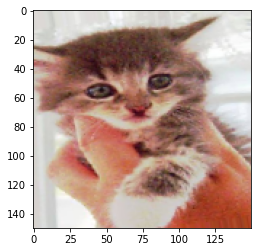

In [41]:
from tensorflow.keras.preprocessing import image

# 파일 목록 가져오기
fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

# 증식시키는 코드
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

# validation은 증식하지 않습니다.
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

# 환경

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
5/5 [==============================] - 8s 2s/step - loss: 0.6410 - accuracy: 0.6438 - val_loss: 0.5757 - val_accuracy: 0.7040
Epoch 2/30
5/5 [==============================] - 8s 2s/step - loss: 0.5804 - accuracy: 0.6875 - val_loss: 0.6842 - val_accuracy: 0.6180
Epoch 3/30
5/5 [==============================] - 9s 2s/step - loss: 0.6380 - accuracy: 0.6875 - val_loss: 0.6021 - val_accuracy: 0.6820
Epoch 4/30
5/5 [==============================] - 9s 2s/step - loss: 0.7010 - accuracy: 0.6062 - val_loss: 0.6268 - val_accuracy: 0.6410
Epoch 5/30
5/5 [==============================] - 9s 2s/step - loss: 0.5941 - accuracy: 0.6875 - val_loss: 0.5904 - val_accuracy: 0.6850
Epoch 6/30
5/5 [==============================] - 9s 2s/step - loss: 0.5734 - accuracy: 0.7250 - val_loss: 0.8408 - val_accuracy: 0.5860
Epoch 7/30
5/5 [==============================] - 9s 2s/step - loss: 0.5239 - accuracy: 0.7250